In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm

In [4]:
fuel_ecom = pd.read_csv('fuel-econ.csv')
fuel_ecom['trans'].value_counts()
fuel_ecom.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0.5, 0, 'vehicle class')

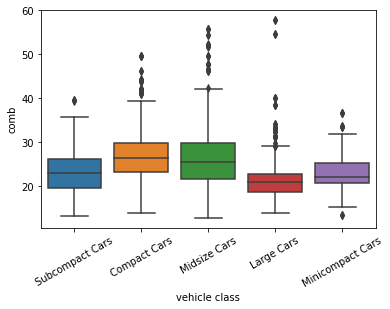

In [5]:
p = sns.boxplot(data=fuel_ecom, x='VClass', y='comb')
plt.xticks(rotation=30)
p.set_xlabel('vehicle class')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Subcompact Cars'),
  Text(1, 0, 'Compact Cars'),
  Text(2, 0, 'Midsize Cars'),
  Text(3, 0, 'Large Cars'),
  Text(4, 0, 'Minicompact Cars')])

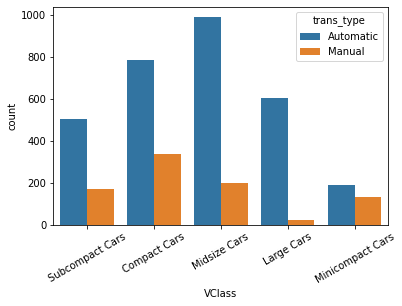

In [19]:
fuel_ecom['trans_type'] = fuel_ecom['trans'].apply(lambda x: x.split()[0])
sns.countplot(data=fuel_ecom, x='VClass', hue='trans_type') 
plt.xticks(rotation = 30)

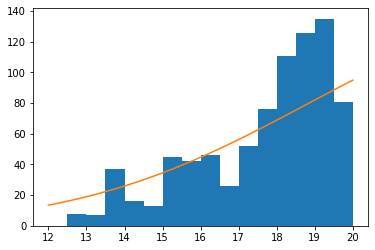

In [7]:
# create a histogram of the data
bin_size = 0.5
bin_edges = np.arange(12, 20 + bin_size, bin_size)
plt.hist(data = fuel_ecom, x = 'comb', bins = bin_edges)

# overlay a theoretical normal distribution on top
samp_mean = fuel_ecom['comb'].mean()
samp_sd = fuel_ecom['comb'].std()

x = np.linspace(12, 20, 100)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= fuel_ecom.shape[0] * bin_size # scale the distribution height

plt.plot(x, y)



/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be place

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Subcompact Cars'),
  Text(1, 0, 'Compact Cars'),
  Text(2, 0, 'Midsize Cars'),
  Text(3, 0, 'Large Cars'),
  Text(4, 0, 'Minicompact Cars')])

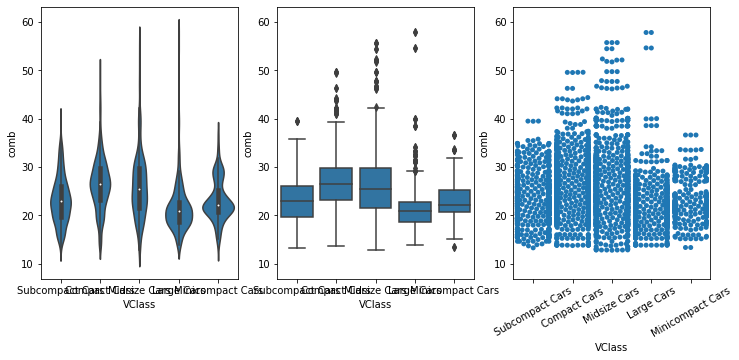

In [8]:
plt.figure(figsize = [12, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sns.violinplot(data = fuel_ecom, x = 'VClass', y = 'comb', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data = fuel_ecom, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sns.swarmplot(data = fuel_ecom, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=30)

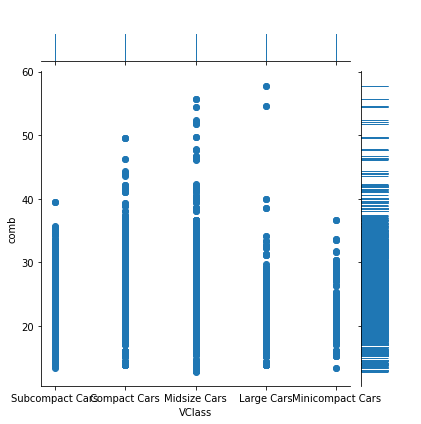

In [9]:
g = sns.JointGrid(data=fuel_ecom, x='VClass', y = 'comb')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot,height=0.5)

<AxesSubplot:xlabel='comb', ylabel='VClass'>

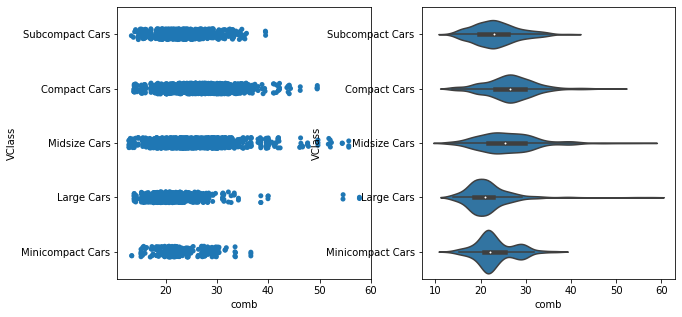

In [10]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(data = fuel_ecom, y = 'VClass', x = 'comb', color=base_color)

plt.subplot(1, 2, 2)
sns.violinplot(data = fuel_ecom, y = 'VClass', x = 'comb', color=base_color)

/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


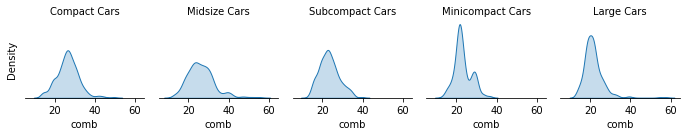

In [11]:
group_means = fuel_ecom.groupby(['VClass']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index

g = sns.FacetGrid(data = fuel_ecom, col = 'VClass', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(sns.kdeplot, 'comb', shade=True)
g.set_titles('{col_name}')

g.set(yticks=[])
g.despine(left=True)


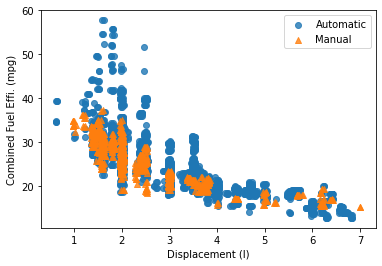

In [12]:
type_marker =  [['Automatic', 'o'], ['Manual', '^']]
fuel_ecom['trans_type'] = fuel_ecom['trans'].apply(lambda x: x.split()[0])

for ttype, markers in type_marker:
    plot_data = fuel_ecom[fuel_ecom['trans_type']==ttype]
    sns.regplot(data = plot_data, x = "displ", y = 'comb', x_jitter = 0.04, fit_reg=False,  marker = markers)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Effi. (mpg)')
plt.legend(['Automatic', 'Manual'])

/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


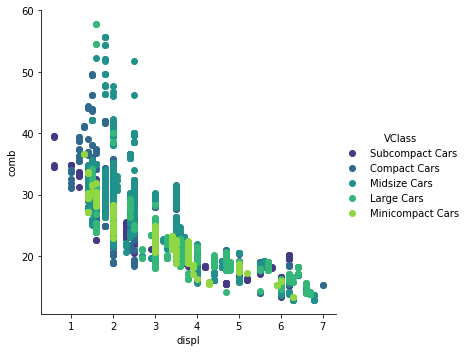

In [13]:
g = sns.FacetGrid(data = fuel_ecom, hue = 'VClass', size = 5, palette='viridis')
g.map(plt.scatter, 'displ', 'comb')
g.add_legend()

/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


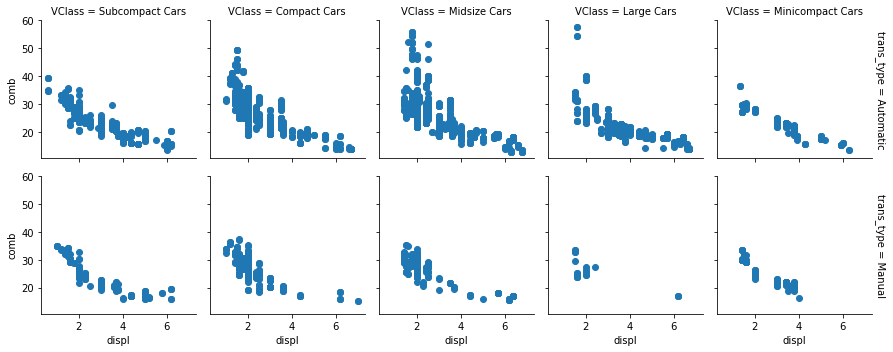

In [16]:
g = sns.FacetGrid(data = fuel_ecom, col = 'VClass', row = 'trans_type', margin_titles=True, size = 2.5)
g.map(plt.scatter, 'displ', 'comb')

In [108]:
xbin_edges = np.arange(1, fuel_ecom['cylinders'].max()+0.5, 0.5)
x_bins = pd.cut(fuel_ecom['cylinders'], xbin_edges, include_lowest=True)
pts_per_bin = fuel_ecom.groupby(x_bins).size()
print(pts_per_bin)

cylinders
(0.999, 1.5]       0
(1.5, 2.0]         6
(2.0, 2.5]         0
(2.5, 3.0]        71
(3.0, 3.5]         0
(3.5, 4.0]      1868
(4.0, 4.5]         0
(4.5, 5.0]        30
(5.0, 5.5]         0
(5.5, 6.0]      1239
(6.0, 6.5]         0
(6.5, 7.0]         0
(7.0, 7.5]         0
(7.5, 8.0]       594
(8.0, 8.5]         0
(8.5, 9.0]         0
(9.0, 9.5]         0
(9.5, 10.0]        0
(10.0, 10.5]       0
(10.5, 11.0]       0
(11.0, 11.5]       0
(11.5, 12.0]     121
dtype: int64


In [101]:
df = fuel_ecom.groupby(['cylinders', 'displ']).size()
df

cylinders  displ
2          0.6        6
3          1.0       12
           1.2       12
           1.5       47
4          1.2        6
           1.3        7
           1.4      136
           1.5       79
           1.6      243
           1.8      189
           2.0      907
           2.1        6
           2.3       22
           2.4      142
           2.5      131
5          2.5       30
6          2.5        8
           2.7        6
           2.9        7
           3.0      515
           3.2        2
           3.3       21
           3.4       40
           3.5      245
           3.6      208
           3.7       77
           3.8      109
           4.0        1
8          3.8        5
           3.9        9
           4.0       74
           4.2        6
           4.3        4
           4.4      130
           4.6       20
           4.7       55
           4.8       20
           5.0       99
           5.2        3
           5.5       29
           5.6       12

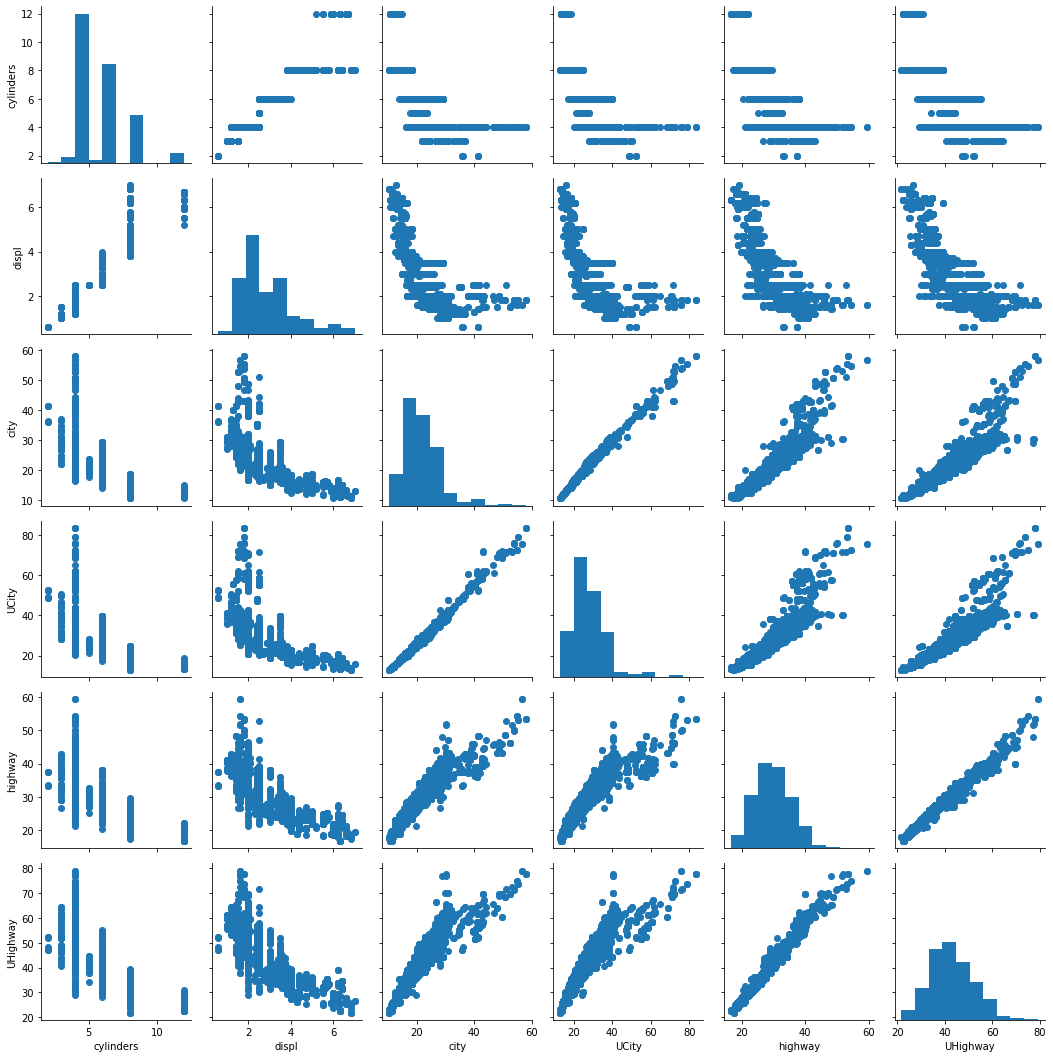

In [113]:
parms = ['cylinders','displ','city','UCity','highway','UHighway']
g = sns.PairGrid(data = fuel_ecom, vars = parms)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

<AxesSubplot:>

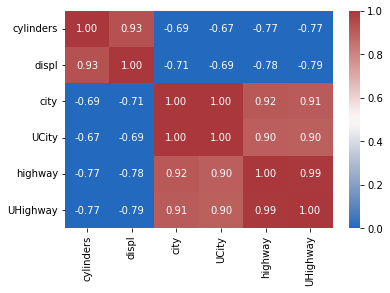

In [117]:
sns.heatmap(fuel_ecom[parms].corr(), cmap = 'vlag', annot = True, fmt = '.2f', vmin=0)